In [2]:
from fastai.vision import *

# Exploring Data

In [3]:
path = Path('data_crash/')

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=256, num_workers=4).normalize(imagenet_stats)

In [4]:
data.classes

['accident', 'no_accident']

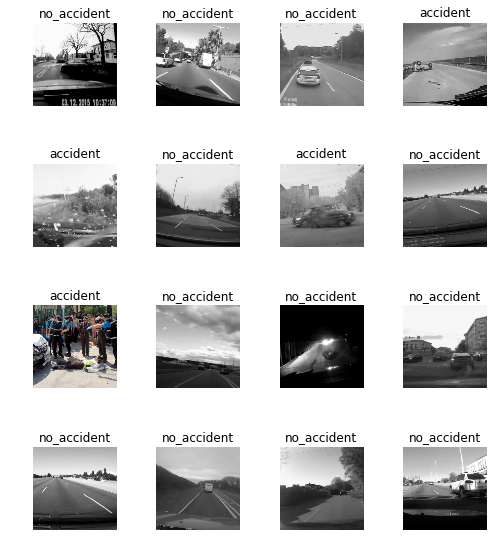

In [5]:
data.show_batch(rows=4, figsize=(7,8))

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['accident', 'no_accident'], 2, 732, 182)

# Train Model

In [5]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


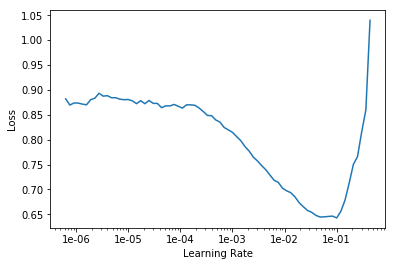

In [9]:
learn.recorder.plot()

In [9]:
lr = 1e-3

In [10]:
learn.fit_one_cycle(10, max_lr=slice(lr))

epoch,train_loss,valid_loss,error_rate,time
1,0.946325,0.644328,0.373626,00:09
2,0.786077,0.427425,0.197802,00:07
3,0.678333,0.353490,0.164835,00:07
4,0.568181,0.322922,0.159341,00:08
5,0.516625,0.299738,0.126374,00:07
6,0.471706,0.280034,0.126374,00:08
7,0.441234,0.271081,0.115385,00:09
8,0.415666,0.265027,0.109890,00:07
9,0.389948,0.262474,0.109890,00:07
10,0.368782,0.261057,0.109890,00:07


In [11]:
learn.save('crash-1')

In [12]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


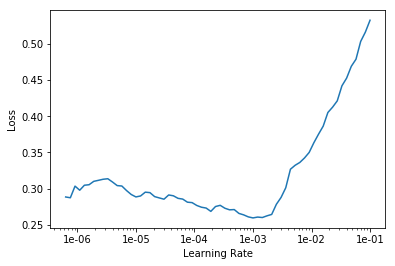

In [14]:
learn.recorder.plot()

In [15]:
# did 15 epochs in fact
learn.fit_one_cycle(10, max_lr=slice(1e-5,lr/5))

epoch,train_loss,valid_loss,error_rate,time
1,0.291564,0.257611,0.104396,00:09
2,0.295444,0.245897,0.098901,00:09
3,0.266155,0.188262,0.076923,00:08
4,0.245097,0.205682,0.071429,00:09
5,0.218689,0.179138,0.043956,00:09
6,0.197824,0.152083,0.049451,00:09
7,0.173619,0.139085,0.043956,00:09
8,0.152661,0.138863,0.043956,00:09
9,0.135971,0.147031,0.043956,00:08
10,0.122903,0.143429,0.043956,00:09


In [16]:
learn.save('crash-1-unfreezed')

## Retrain with higher size

In [5]:
learn.load('crash-1-unfreezed')

Learner(data=ImageDataBunch;

Train: LabelList (732 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
no_accident,no_accident,no_accident,no_accident,no_accident
Path: data_crash;

Valid: LabelList (182 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
no_accident,accident,no_accident,no_accident,no_accident
Path: data_crash;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64

In [6]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=356, num_workers=4).normalize(imagenet_stats)

In [7]:
learn.data = data

In [8]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


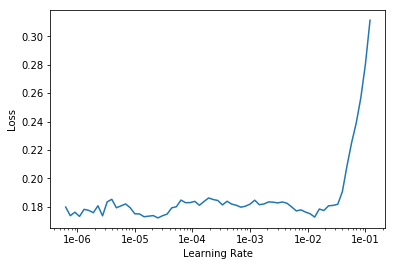

In [9]:
learn.lr_find()
learn.recorder.plot()

In [10]:
lr = 1e-3
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
1,0.177640,0.145357,0.049451,00:16
2,0.172119,0.149809,0.049451,00:15
3,0.170329,0.153032,0.049451,00:15
4,0.162581,0.148692,0.054945,00:15
5,0.152144,0.149329,0.054945,00:15


In [11]:
learn.save('crash-356')

In [12]:
learn.unfreeze()

In [13]:
learn.fit_one_cycle(5, slice(1e-5/5, lr/5))

epoch,train_loss,valid_loss,error_rate,time
1,0.128042,0.156772,0.054945,00:20
2,0.122269,0.146675,0.043956,00:19
3,0.112866,0.135941,0.032967,00:17
4,0.110020,0.133336,0.032967,00:18
5,0.112192,0.133746,0.032967,00:17


In [14]:
learn.save('crash-512-unfreezed')

# Interpretation

In [6]:
learn.load('crash-512-unfreezed')

Learner(data=ImageDataBunch;

Train: LabelList (732 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
no_accident,no_accident,no_accident,no_accident,no_accident
Path: data_crash;

Valid: LabelList (182 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
no_accident,accident,no_accident,no_accident,no_accident
Path: data_crash;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

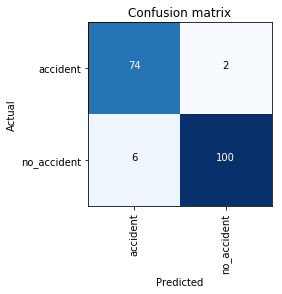

In [10]:
interp.plot_confusion_matrix()

In [18]:
176/182

0.967032967032967

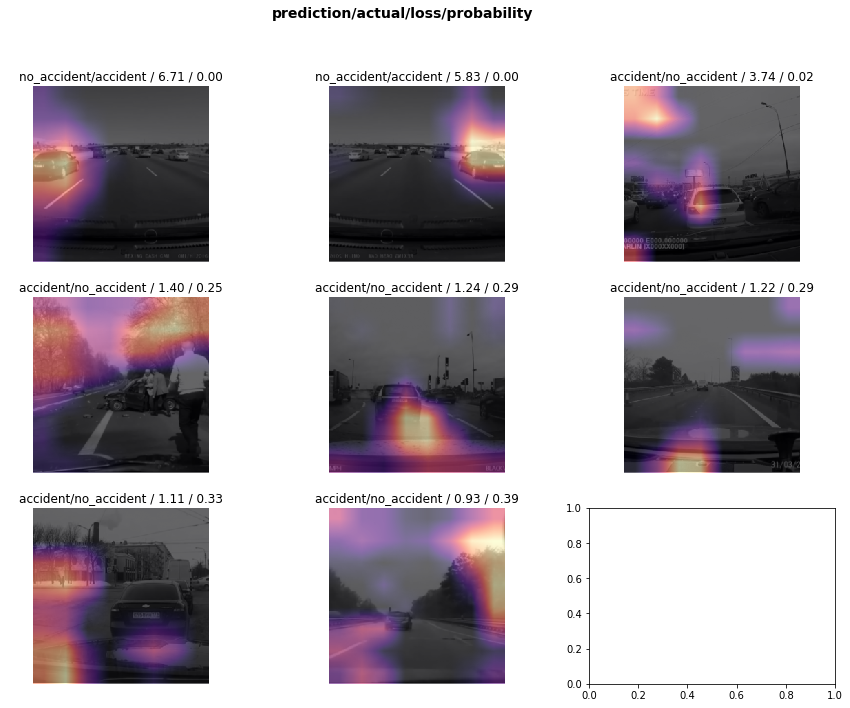

In [11]:
interp.plot_top_losses(8, figsize=(15,11))

## Cleaning up

In [12]:
from fastai.widgets import *

In [13]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [14]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [2]:
!cd darknet && ./darknet detector demo cfg/coco.data cfg/yolov3-tiny.cfg cfg/yolov3-tiny.weights ../Cars_VS_Cyclist_-_Compilations.mp4

Demo
layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   1

In [7]:
learn.export()

In [1]:
from fastai.vision import *

In [2]:
path = 'data_crash'
learn = load_learner(path)

In [3]:
import cv2
import time
import numpy as np
import remotecv
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-10*x+5))

In [9]:
testvid = 'darknet_remote/res.avi'
vid = cv2.VideoCapture(testvid)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
writer = cv2.VideoWriter('output.avi',fourcc, 15.0, (320,240))

# Start time
start = time.time()

font = cv2.FONT_HERSHEY_SIMPLEX

ret = 1
#for i in range(num_frames):
probs = []
pred = "no_accident"
while ret:
    ret, frame = vid.read()
    if not ret: break
    t = Image(1 - torch.tensor(np.ascontiguousarray(np.flip(frame.astype('float32')/255, 2)).transpose(2,0,1)))
    img = Image(1 - torch.tensor(np.ascontiguousarray(np.flip(frame.astype('float32')/255, 2)).transpose(2,0,1)))
    #cv2.imwrite(file, frame)
    pred_class, pred_idx, outputs = learn.predict(t)
    probs.append(outputs.data.cpu().numpy()[0])
    
    frame = cv2.rectangle(frame,(230,60),(320,7),(0,0,255),2)
    
    if pred == "accident": 
        pred = "accident" # while no counter request
        color = (0, 0, 255)
        prob = sigmoid(outputs.data.cpu().numpy()[0])
    else:
        if np.mean(np.array(probs[-5:])) >= 0.5: 
            pred = "accident"
            color = (0, 0, 255)
            prob = sigmoid(outputs.data.cpu().numpy()[0])
        else: 
            pred = "no_accident"
            color = (50, 205, 50)
            prob = sigmoid(outputs.data.cpu().numpy()[0])
    
    out = cv2.putText(frame, pred, (240, 30), font, 0.4, color, 1, cv2.LINE_AA)
    out = cv2.putText(out, "p = " + str(round(prob, 3)), (240, 50), font, 0.4, (0,0,0), 1, cv2.LINE_AA)
    
    writer.write(out)
    #print(pred_class)
    #print(outputs.data.cpu().numpy()[0])
    
    

# End time
end = time.time()

# Time elapsed
seconds = end - start
print("Time taken : {0} seconds".format(seconds))

Time taken : 10.464888334274292 seconds
